- Check the wind error and random retrieval error
- Calculate the shape error

In [1]:
import os
import numpy as np
from glob import glob
from itertools import chain
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rcParams
font_size = 17
rcParams['axes.titlesize'] = font_size
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.labelsize'] = font_size - 2
rcParams['xtick.labelsize'] = font_size - 2
rcParams['ytick.labelsize'] = font_size - 2
rcParams['legend.fontsize'] = font_size
rcParams['figure.titlesize'] = font_size
rcParams['figure.titleweight'] = 'bold'

In [3]:
data_dir = '../data/Hyper_TROPOMI_plume/'

filelist = list(chain(*[glob(os.path.join(data_dir, '**', '*csv'), recursive=True)]))

df = pd.concat((pd.read_csv(f) for f in filelist), ignore_index=True)

## Wind error and random error

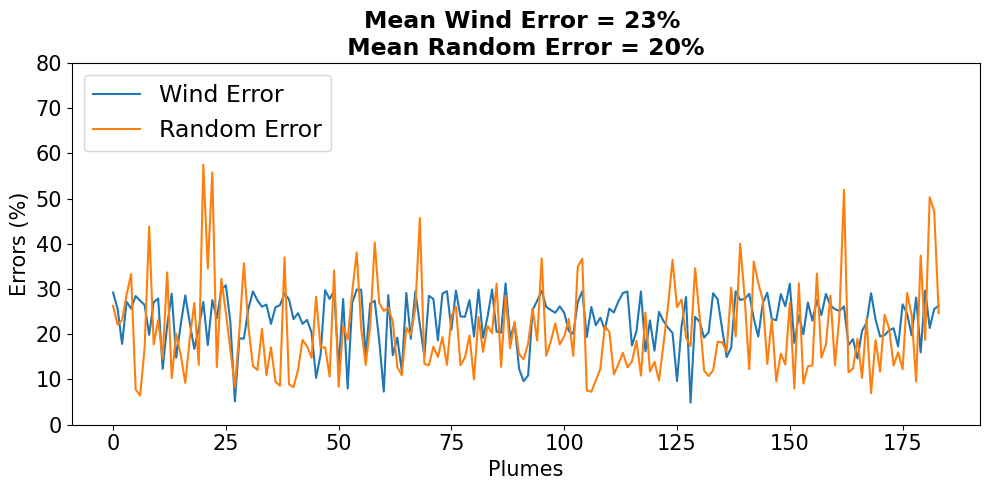

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df['emission_uncertainty_wind']/df['emission']*1e2, label='Wind Error')
ax.plot(df['emission_uncertainty_random']/df['emission']*1e2, label='Random Error')

ax.set_ylabel('Errors (%)')
ax.set_xlabel('Plumes')
ax.set_ylim(0, 80)

mean_err_wind = int(np.mean(df['emission_uncertainty_wind']/df['emission'])*100)
mean_err_random = int(np.mean(df['emission_uncertainty_random']/df['emission'])*100)

plt.legend(loc='upper left')
plt.title(f'Mean Wind Error = {mean_err_wind}% \n Mean Random Error = {mean_err_random}% ')

fig.tight_layout()
fig.savefig('../figures/errors.pdf')

## Shape error

$\frac{\Delta Q}{Q} = \frac{IME}{L} \frac{\alpha_2^* - \alpha_2}{U_{eff}}$

In [5]:
new_alpha2 = 0.42
df['err_shape'] =  (new_alpha2 - df['alpha2']) / df['ueff_ime']

In [6]:
df.columns

Index(['plume_id', 'plume_latitude', 'plume_longitude', 'datetime', 'country',
       'state', 'city', 'name', 'ipcc_sector', 'gas', 'cmf_type',
       'plume_bounds', 'instrument', 'platform', 'emission',
       'emission_uncertainty', 'emission_uncertainty_random',
       'emission_uncertainty_wind', 'wind_speed', 'wind_direction',
       'wind_source', 'ueff_ime', 'alpha1', 'alpha2', 'alpha3', 'niter',
       'size_median', 'sigma_guass', 'quantile', 'wind_weights',
       'source_tropomi', 'source_trace', 'leff_ime', 'ime', 'emission_fetch',
       'emission_fetch_uncertainty', 'emission_fetch_uncertainty_ime',
       'emission_fetch_uncertainty_wind', 'wind_source_all', 'wind_speed_all',
       'wind_direction_all', 'err_shape'],
      dtype='object')

In [7]:
print('shape error: ', df['err_shape'].std())

shape error:  0.0564628337927865


In [8]:
df_subset = df[df['name'] == 'Ghabawi']

error = np.std(df_subset['ime']/df_subset['leff_ime']*(new_alpha2 - df_subset['alpha2']))*3600
error / df_subset['emission']

162    0.184040
163    0.070979
164    0.076802
165    0.092416
166    0.107145
167    0.199749
168    0.036225
169    0.133673
170    0.093712
171    0.096368
172    0.105254
173    0.040307
174    0.052022
175    0.134829
Name: emission, dtype: float64